# Logistic Regression
You should build a machine learning pipeline using a logistic regression model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Train and test a logistic regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, preprocessing
from sklearn.linear_model import LogisticRegression

In [19]:
# df = pd.read_csv("../../datasets/mnist.csv")
# df = df.set_index("id")
# df.head()

def process(image):
    image -= image.min()
    image /= image.max()
    image *= 255
    return image.astype(np.uint8)

In [20]:
# load MNIST dataset
mnist = datasets.load_digits()
images = mnist.images
labels = mnist.target
data_size = len(images)



In [21]:
# preprocessing images
images = images.reshape(len(images), -1)
images = preprocessing.scale(images)

In [22]:
# split dataset into train and test sets with train size of 75%
split = 0.75
X_train, y_train = images[:int(data_size * split)], labels[:int(data_size * split)]
X_test, y_test = images[int(data_size * split):], labels[int(data_size * split):]

In [23]:
# initialize Logistic Regression
LR_classifier = LogisticRegression(C=0.01, penalty='l2', tol=0.01)

In [24]:
# train the LR_classifier on X_train, y_train
LR_classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, tol=0.01)

In [25]:
# test the LR_classifier on X_test
predictions = LR_classifier.predict(X_test)

In [26]:

# log the performance report of the LR_classifier using y_test and predictions
print("Performance Report: \n %s \n" % (metrics.classification_report(y_test, predictions)))

Performance Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.88      0.78      0.83        46
           2       1.00      1.00      1.00        43
           3       0.97      0.74      0.84        47
           4       0.98      0.94      0.96        48
           5       0.86      0.96      0.91        45
           6       0.96      0.96      0.96        47
           7       0.92      0.98      0.95        45
           8       0.75      0.80      0.78        41
           9       0.72      0.87      0.79        45

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450
 



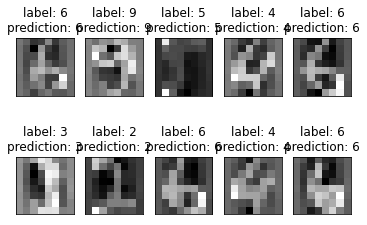

In [27]:
# display predictions on some random images from test set
R, C = 2, 5
N = R * C
indices = np.random.randint(0, len(X_test), size=N)
for i, idx in enumerate(indices):
    test_image = X_test[idx].reshape((1, -1))
    prediction = LR_classifier.predict(test_image)[0]
    ax = plt.subplot(R, C, i + 1)
    plot_image = process(test_image.reshape((8, 8)))
    ax.title.set_text(f'label: {y_test[idx]}\nprediction: {prediction}')
    ax.imshow(plot_image, cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()